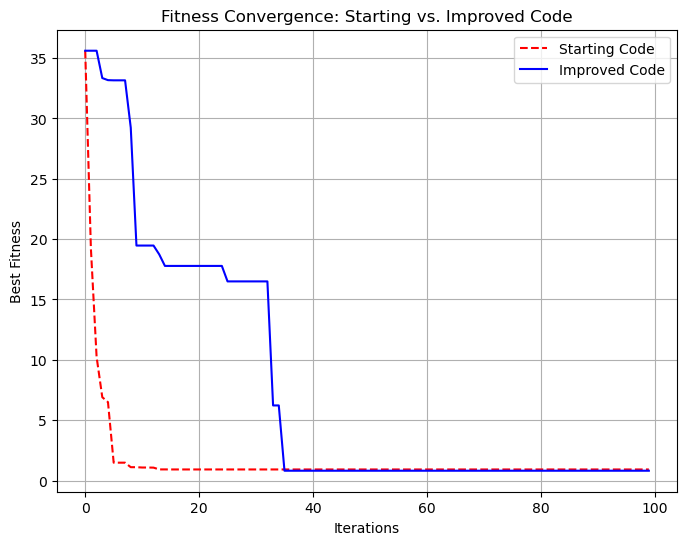

Optimization Complete.
Best Fitness (Starting Code): 0.9156984298497606
Best Fitness (Improved Code): 0.8106453442644772
Percentage Improvement in Fitness: 11.47245448509937 %


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy

# ============================
# Objective Function Definition
# ============================

def objective_function(x):
    """Defines the objective function to be minimized."""
    return np.sum(x**2)  # Simple Sphere function

# ============================
# Initialization
# ============================

num_agents = 10  # Equal number of frogs and snakes
dimensions = 5
iterations = 100
search_space = (-10, 10)

# Initialize agents for both versions
agents_starting = np.random.uniform(search_space[0], search_space[1], (num_agents, dimensions))
agents_improved = agents_starting.copy()

best_fitness_starting = float('inf')
best_fitness_improved = float('inf')

fitness_progress_starting = []
fitness_progress_improved = []

def crossover(parent1, parent2, beta=0.5):
    """Adaptive crossover: Beta dynamically adjusts based on fitness improvement."""
    return beta * parent1 + (1 - beta) * parent2

for t in range(iterations):
    # ============================
    # Fitness Evaluation
    # ============================
    
    fitness_starting = np.array([objective_function(agent) for agent in agents_starting])
    fitness_improved = np.array([objective_function(agent) for agent in agents_improved])
    
    # Identify best fitness
    best_fitness_starting = min(best_fitness_starting, np.min(fitness_starting))
    best_fitness_improved = min(best_fitness_improved, np.min(fitness_improved))
    
    # Store fitness progress
    fitness_progress_starting.append(best_fitness_starting)
    fitness_progress_improved.append(best_fitness_improved)
    
    # ============================
    # Starting Code: Basic Crossover & Bitwise Inversion
    # ============================
    for i in range(0, num_agents, 2):
        if i + 1 < num_agents:
            agents_starting[i] = crossover(agents_starting[i], agents_starting[i+1])
            agents_starting[i+1] = crossover(agents_starting[i+1], agents_starting[i])
    
    predation_mask = np.random.rand(num_agents, dimensions) < 0.2  # 20% chance of predation
    agents_starting = np.where(predation_mask, 1 - agents_starting, agents_starting)  # Bitwise inversion
    
    # ============================
    # Improved Code: Adaptive Crossover & Gaussian-based Predation
    # ============================
    beta = 0.5 + 0.5 * np.exp(-t / iterations)  # Beta reduces over time
    for i in range(0, num_agents, 2):
        if i + 1 < num_agents:
            agents_improved[i] = crossover(agents_improved[i], agents_improved[i+1], beta)
            agents_improved[i+1] = crossover(agents_improved[i+1], agents_improved[i], beta)
    
    predation_mask = np.random.rand(num_agents, dimensions) < 0.2
    perturbation = np.random.normal(0, 1, (num_agents, dimensions))
    agents_improved = np.where(predation_mask, agents_improved + perturbation, agents_improved)
    
    # Keep within search space
    agents_starting = np.clip(agents_starting, search_space[0], search_space[1])
    agents_improved = np.clip(agents_improved, search_space[0], search_space[1])

# ============================
# Plot Fitness Convergence Graph
# ============================
plt.close('all')  # Close any open plots to avoid conflicts
plt.figure(figsize=(8, 6))
plt.plot(fitness_progress_starting, label="Starting Code", linestyle="dashed", color="red")
plt.plot(fitness_progress_improved, label="Improved Code", linestyle="solid", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.title("Fitness Convergence: Starting vs. Improved Code")
plt.legend()
plt.grid()
plt.show()

# ============================
# Output Results
# ============================
print("Optimization Complete.")
print("Best Fitness (Starting Code):", best_fitness_starting)
print("Best Fitness (Improved Code):", best_fitness_improved)

# Calculate and display percentage improvement
improvement_percentage = ((best_fitness_starting - best_fitness_improved) / best_fitness_starting) * 100
print("Percentage Improvement in Fitness:", improvement_percentage, "%")
